In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.drop(['Id'], inplace = True, axis = 1 )
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train_labels = train['Cover_Type']
np.sum(train_labels == 7)

2160

In [5]:
train.drop(['Cover_Type'], inplace = True, axis = 1 )
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=42)

In [7]:
def train_inference_KNN(number_of_neigbor):
    print("training KNN model ...")
    print("the number of neig is: " +str(number_of_neigbor))
    model = KNeighborsClassifier(n_neighbors=number_of_neigbor)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return np.sum(predictions == y_test)/len(y_test), model

In [8]:
accuracy = []
max_acc = 0
KNN_model = None
for num in range(5, 19, 2):
    cur, model = train_inference_KNN(num)
    if KNN_model == None or max_acc < cur:
        max_acc = cur
        KNN_model = model
    accuracy.append(cur)
print(accuracy)
print("the best accuracy is : " +str(max_acc))

training KNN model ...
the number of neig is: 5
training KNN model ...
the number of neig is: 7
training KNN model ...
the number of neig is: 9
training KNN model ...
the number of neig is: 11
training KNN model ...
the number of neig is: 13
training KNN model ...
the number of neig is: 15
training KNN model ...
the number of neig is: 17
[0.8048941798941799, 0.7876984126984127, 0.7767857142857143, 0.7592592592592593, 0.7585978835978836, 0.7529761904761905, 0.7490079365079365]
the best accuracy is : 0.8048941798941799


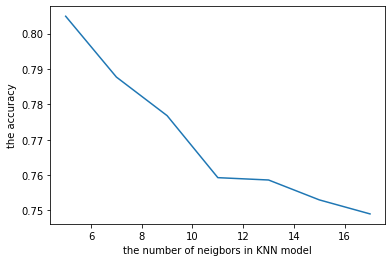

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(5, 19, 2), accuracy)
plt.ylabel("the accuracy")
plt.xlabel("the number of neigbors in KNN model")
plt.show()

In [10]:
### train Desion tree model and create a function:
from sklearn.tree import DecisionTreeClassifier
def train_inference_DT(max_depth_):
    print("train the decision tree model with maxdepth is " +str(max_depth_))
    model = DecisionTreeClassifier(max_depth=max_depth_)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return np.sum(predictions == y_test)/len(y_test), model

In [11]:
accuracy = []
DT_model = None
max_acc = 0
for num in range(5, 40, 3):
    cur, model = train_inference_DT(num)
    if DT_model==None or max_acc < cur:
        max_acc = cur
        DT_model = model
    accuracy.append(cur)
print(accuracy)
print("the best accuracy is : " +str(max_acc))

train the decision tree model with maxdepth is 5
train the decision tree model with maxdepth is 8
train the decision tree model with maxdepth is 11
train the decision tree model with maxdepth is 14
train the decision tree model with maxdepth is 17
train the decision tree model with maxdepth is 20
train the decision tree model with maxdepth is 23
train the decision tree model with maxdepth is 26
train the decision tree model with maxdepth is 29
train the decision tree model with maxdepth is 32
train the decision tree model with maxdepth is 35
train the decision tree model with maxdepth is 38
[0.6484788359788359, 0.7337962962962963, 0.7724867724867724, 0.798941798941799, 0.7972883597883598, 0.7903439153439153, 0.7883597883597884, 0.7953042328042328, 0.7919973544973545, 0.7896825396825397, 0.7883597883597884, 0.7976190476190477]
the best accuracy is : 0.798941798941799


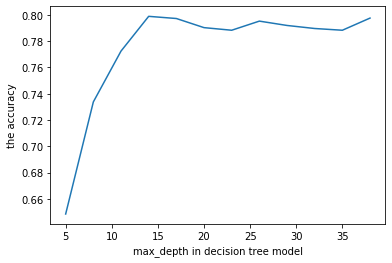

In [12]:
### draw decision tree result
plt.plot(range(5, 40, 3), accuracy)
plt.ylabel("the accuracy")
plt.xlabel("max_depth in decision tree model")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
# random forest tree model
def train_inference_random_forest_tree(n_estimator_, max_depth_):
    print(" the number of tree is " + str(n_estimator_))
    print("train the random forest tree model with maxdepth is " +str(max_depth_))
    model = RandomForestClassifier(max_depth=max_depth_)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return np.sum(predictions == y_test)/len(y_test), model

In [14]:
# train  random FT model and fix n_estimator == 10
# thorugh change depth of tree to investigate the accuracy changes

accuracy = []
RFT_model = None
max_acc = 0
for num in range(5, 40, 3):
    cur, model = train_inference_random_forest_tree(10, num)
    if RFT_model==None or max_acc < cur:
        max_acc = cur
        RFT_model = model
    accuracy.append(cur)
print(accuracy)
print("the best accuracy is : " +str(max_acc))

 the number of tree is 10
train the random forest tree model with maxdepth is 5


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 8


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 11


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 14


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 17


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 20


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 23


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 26


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 29


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 32


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 35


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 38


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.6441798941798942, 0.7261904761904762, 0.7857142857142857, 0.8068783068783069, 0.8207671957671958, 0.8293650793650794, 0.8356481481481481, 0.8369708994708994, 0.845568783068783, 0.8373015873015873, 0.8373015873015873, 0.8412698412698413]
the best accuracy is : 0.845568783068783


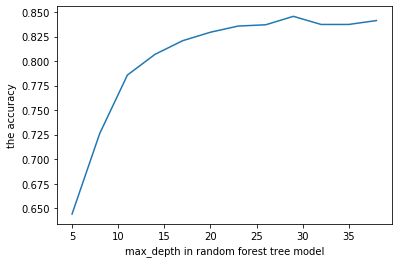

In [15]:
plt.plot(range(5, 40, 3), accuracy)
plt.ylabel("the accuracy")
plt.xlabel("max_depth in random forest tree model")
plt.show()

### the reason is accuracy is a little low is that the model could be overfitting. Also, the data wasn't preprocessed, so we need to preprocess the data so that we can get better result. 

In [16]:
from sklearn.preprocessing import StandardScaler
columns = []
for name in train.columns:
    columns.append(name)

# use PCA to preprocess data, firtly try 7 components 
from sklearn.decomposition import PCA
X = train.loc[:,columns].values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])

In [17]:
principalDf.head()

,p1,p2,p3,p4,p5,p6,p7
0,-2.378737,2.084546,-2.651738,0.848309,-0.073359,-1.087000,0.076184
1,-2.349877,1.988656,-2.847306,0.730606,-0.092196,-1.026649,0.051843
2,-3.167167,1.964863,-2.260572,1.085278,1.045913,-2.008719,2.605711
3,-2.376560,2.709566,-0.820996,1.704663,-0.142080,-0.894751,-1.522115
4,-2.275787,2.059932,-2.879271,0.678137,-0.156752,-0.970753,0.056889


In [18]:
print(" the number of total pricipalDf is " + str(len(principalDf)))

 the number of total pricipalDf is 15120


In [19]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, train_labels, test_size=0.2, random_state=42)

In [20]:
accuracy = []
DT_model = None
max_acc = 0
for num in range(5, 40, 3):
    cur, model = train_inference_DT(num)
    if DT_model==None or max_acc < cur:
        max_acc = cur
        DT_model = model
    accuracy.append(cur)
print(accuracy)
print("the best accuracy is : " +str(max_acc))

train the decision tree model with maxdepth is 5
train the decision tree model with maxdepth is 8
train the decision tree model with maxdepth is 11
train the decision tree model with maxdepth is 14
train the decision tree model with maxdepth is 17
train the decision tree model with maxdepth is 20
train the decision tree model with maxdepth is 23
train the decision tree model with maxdepth is 26
train the decision tree model with maxdepth is 29
train the decision tree model with maxdepth is 32
train the decision tree model with maxdepth is 35
train the decision tree model with maxdepth is 38
[0.5595238095238095, 0.6448412698412699, 0.6703042328042328, 0.6974206349206349, 0.683531746031746, 0.6815476190476191, 0.6858465608465608, 0.6917989417989417, 0.6911375661375662, 0.6924603174603174, 0.6875, 0.6868386243386243]
the best accuracy is : 0.6974206349206349


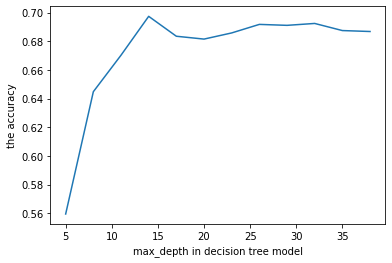

In [21]:
plt.plot(range(5, 40, 3), accuracy)
plt.ylabel("the accuracy")
plt.xlabel("max_depth in decision tree model")
plt.show()

In [22]:
# try random forest tree using PCA 
accuracy = []
RFT_model = None
max_acc = 0
for num in range(5, 40, 3):
    cur, model = train_inference_random_forest_tree(10, num)
    if RFT_model==None or max_acc < cur:
        max_acc = cur
        RFT_model = model
    accuracy.append(cur)
print(accuracy)
print("the best accuracy is : " +str(max_acc))

 the number of tree is 10
train the random forest tree model with maxdepth is 5


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 8


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 11


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 14


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 17


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 20


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 23


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 26


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 29


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 32


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 35


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 the number of tree is 10
train the random forest tree model with maxdepth is 38


c:\users\lixx3527\anaconda2\envs\pytorch_new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.5859788359788359, 0.6636904761904762, 0.7106481481481481, 0.7361111111111112, 0.7496693121693122, 0.7536375661375662, 0.7516534391534392, 0.7443783068783069, 0.7509920634920635, 0.75, 0.7536375661375662, 0.7509920634920635]
the best accuracy is : 0.7536375661375662


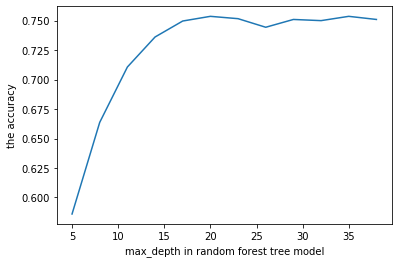

In [23]:
plt.plot(range(5, 40, 3), accuracy)
plt.ylabel("the accuracy")
plt.xlabel("max_depth in random forest tree model")
plt.show()

###  The big problem over here is that we probably didn't choose correct model, let's try gradient boosting tree algorithm, and hope we can get better result

In [26]:
def train_inference_GDBT(n_estimator_, max_depth_):
    print(" the number of tree is " + str(n_estimator_))
    print("train the GDBT tree model with maxdepth is " +str(max_depth_))
    model = GradientBoostingClassifier(max_depth=max_depth_, n_estimators = n_estimator_)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return np.sum(predictions == y_test)/len(y_test), model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=42)
accuracy = []
GDBT_model = None
max_acc = 0
for num in range(5, 40, 3):
    cur, model = train_inference_GDBT(10, num)
    if GDBT_model==None or max_acc < cur:
        max_acc = cur
        GDBT_model = model
    accuracy.append(cur)
print(accuracy)
print("the best accuracy is : " + str(max_acc))

 the number of tree is 10
train the GDBT tree model with maxdepth is 5
 the number of tree is 10
train the GDBT tree model with maxdepth is 8
 the number of tree is 10
train the GDBT tree model with maxdepth is 11
 the number of tree is 10
train the GDBT tree model with maxdepth is 14
 the number of tree is 10
train the GDBT tree model with maxdepth is 17
 the number of tree is 10
train the GDBT tree model with maxdepth is 20
 the number of tree is 10
train the GDBT tree model with maxdepth is 23
 the number of tree is 10
train the GDBT tree model with maxdepth is 26
 the number of tree is 10
train the GDBT tree model with maxdepth is 29
 the number of tree is 10
train the GDBT tree model with maxdepth is 32
 the number of tree is 10
train the GDBT tree model with maxdepth is 35
 the number of tree is 10
train the GDBT tree model with maxdepth is 38
[0.7493386243386243, 0.8088624338624338, 0.8283730158730159, 0.8293650793650794, 0.8250661375661376, 0.8184523809523809, 0.812169312169312